In [1]:
%matplotlib inline

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-8xd9cewh because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt  
import numpy as np
import csv

In [4]:
filename = "/scratch/pc2-mitarbeiter/arjunr/fft_cpu_ref/fftw/csv/patient/singlenode/perf_all_17.01.csv"
imgdir="/scratch/pc2-mitarbeiter/arjunr/fft_cpu_ref/fftw/images/"
data = pd.read_csv(filename)

In [4]:
# Import FFTW runtimes from CSV
x = []
y = []

with open(filename,'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(int(row[0]))
        y.append(float(row[1]))

# adding zeroes to fill [0 - 16)
size = list(range(0,16)) + x
fftw_runtime = [0.0] * 16 + y 

In [8]:
# FFT kernel and model execution performances
kernel = []
kernel = [0.0]* 16 + [0.701] * 16 + [1.636] * 32 + [6.579] * 64 + [33.571] * 128 + [0.0]
model = [0.0]* 16 + [0.046] * 16 + [0.694] * 32 + [4.669] * 64 + [35.338] * 128 + [282.70] * 256 + [2000] * 512

model_fft1d16 = [float(i) / 2.0 for i in model]

kernel[64]=0.184
kernel[128]=2.776
kernel[256]=18.676

model[64]=0.184
model[128]=2.776
model[256]=18.676

model_fft1d16[64]=0.184
model_fft1d16[128]=2.776
model_fft1d16[256]=18.676

fpga_runtime = kernel
model_runtime = model
model_fft1d16_runtime = model_fft1d16

In [9]:
# Find primes in the range
import sympy as spy
prime_32 = list(spy.primerange(16, 32))
prime_64 = list(spy.primerange(32, 64))
prime_128 = list(spy.primerange(64, 128))
prime_256 = list(spy.primerange(128, 256))
prime_512 = list(spy.primerange(256, 512))
prime_670 = list(spy.primerange(512, 670))

test_array = np.asarray(fftw_runtime)
fftw_primes_32 = test_array[prime_32]
fftw_primes_64 = test_array[prime_64]
fftw_primes_128 = test_array[prime_128]
fftw_primes_256 = test_array[prime_256]
fftw_primes_512 = test_array[prime_512]
fftw_primes_670 = test_array[prime_670]

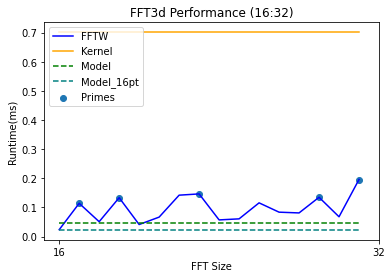

In [14]:
# Plot for range 16-32
xtickers = [ 2**j for j in range(4,6) ]
ytickers = np.arange(0, 0.8, 0.1)
plt.plot(size[16:32], fftw_runtime[16:32], label='FFTW', color='blue')
plt.plot(size[16:32], fpga_runtime[16:32], label='Kernel', color='orange')
plt.plot(size[16:32], model_runtime[16:32], label='Model', color='green', linestyle='dashed')
plt.plot(size[16:32], model_fft1d16_runtime[16:32], label='Model_16pt', color='teal', linestyle='dashed')
plt.scatter(prime_32, fftw_primes_32,label='Primes')
plt.xlabel('FFT Size')
plt.ylabel('Runtime(ms)')
plt.title('FFT3d Performance (16:32)')
plt.xticks(xtickers)
plt.yticks(ytickers)
plt.legend(loc='upper left')
plt.savefig(imgdir+'perf_32.png')
plt.show()

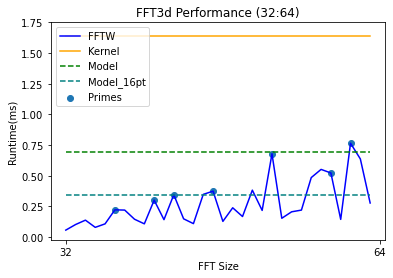

In [15]:
xtickers = [ 2**j for j in range(5,7) ]
ytickers = np.arange(0, 2, 0.25)
plt.plot(size[32:64], fftw_runtime[32:64], label='FFTW', color='blue')
plt.plot(size[32:64], fpga_runtime[32:64], label='Kernel', color='orange')
plt.plot(size[32:64], model_runtime[32:64], label='Model', color='green', linestyle='dashed')
plt.plot(size[32:64], model_fft1d16_runtime[32:64], label='Model_16pt', color='teal', linestyle='dashed')
plt.scatter(prime_64, fftw_primes_64,label='Primes')
plt.xlabel('FFT Size')
plt.ylabel('Runtime(ms)')
plt.title('FFT3d Performance (32:64)')
plt.xticks(xtickers)
plt.yticks(ytickers)
plt.legend(loc='upper left')
plt.savefig(imgdir+'perf_64.png')
plt.show()

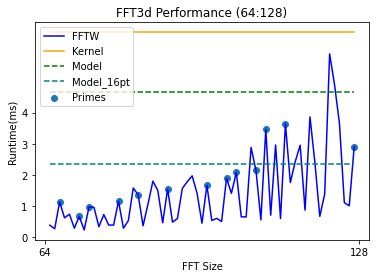

In [16]:
xtickers = [ 2**j for j in range(6,8) ]
ytickers = np.arange(0, 5, 1)
plt.plot(size[65:128], fftw_runtime[65:128], label='FFTW', color='blue')
plt.plot(size[65:128], fpga_runtime[65:128], label='Kernel', color='orange')
plt.plot(size[65:128], model_runtime[65:128], label='Model', color='green', linestyle='dashed')
plt.plot(size[65:128], model_fft1d16_runtime[65:128], label='Model_16pt', color='teal', linestyle='dashed')
plt.scatter(prime_128, fftw_primes_128,label='Primes')

plt.xlabel('FFT Size')
plt.ylabel('Runtime(ms)')
plt.title('FFT3d Performance (64:128)')
plt.xticks(xtickers)
plt.yticks(ytickers)
plt.legend(loc='upper left')
plt.savefig(imgdir+'perf_128.png')
plt.show()

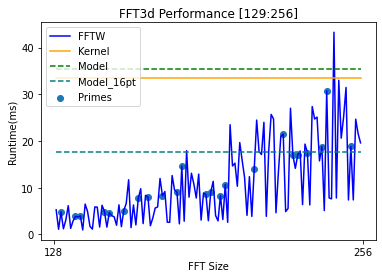

In [17]:
xtickers = [ 2**j for j in range(7,9) ]
ytickers = np.arange(0, 50, 10)
plt.plot(size[129:256], fftw_runtime[129:256], label='FFTW', color='blue')
plt.plot(size[129:256], fpga_runtime[129:256], label='Kernel', color='orange')
plt.plot(size[129:256], model_runtime[129:256], label='Model', color='green', linestyle='dashed')
plt.plot(size[129:256], model_fft1d16_runtime[129:256], label='Model_16pt', color='teal', linestyle='dashed')
plt.scatter(prime_256, fftw_primes_256,label='Primes')

plt.xlabel('FFT Size')
plt.ylabel('Runtime(ms)')
plt.title('FFT3d Performance [129:256]')
plt.xticks(xtickers)
plt.yticks(ytickers)
plt.legend(loc='upper left')
plt.savefig(imgdir+'perf_256.png')
plt.show()

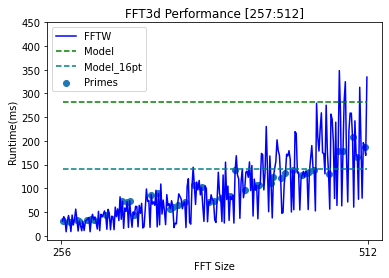

In [18]:
xtickers = [ 2**j for j in range(8,10) ]
ytickers = np.arange(0, 500, 50)
plt.plot(size[257:512], fftw_runtime[257:512], label='FFTW', color='blue')
plt.plot(size[257:512], model_runtime[257:512], label='Model', color='green', linestyle='dashed')
plt.plot(size[257:512], model_fft1d16_runtime[257:512], label='Model_16pt', color='teal', linestyle='dashed')
plt.scatter(prime_512, fftw_primes_512,label='Primes')

plt.xlabel('FFT Size')
plt.ylabel('Runtime(ms)')
plt.title('FFT3d Performance [257:512]')
plt.xticks(xtickers)
plt.yticks(ytickers)
plt.legend(loc='upper left')
plt.savefig(imgdir+'perf_512.png')
plt.show()

##### 

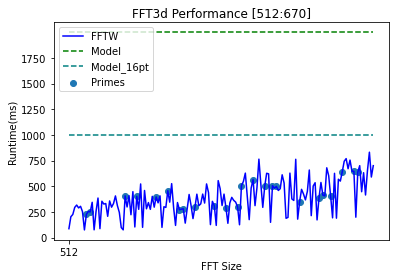

In [397]:
xtickers = [ 2**j for j in range(9,10) ]
ytickers = np.arange(0, 2000, 250)
plt.plot(size[512:670], fftw_runtime[512:670], label='FFTW', color='blue')
plt.plot(size[512:670], model_runtime[512:670], label='Model', color='green', linestyle='dashed')
plt.plot(size[512:670], model_fft1d16_runtime[512:670], label='Model_16pt', color='teal', linestyle='dashed')
plt.scatter(prime_670, fftw_primes_670,label='Primes')

plt.xlabel('FFT Size')
plt.ylabel('Runtime(ms)')
plt.title('FFT3d Performance [512:670]')
plt.xticks(xtickers)
plt.yticks(ytickers)
plt.legend(loc='upper left')
plt.savefig(imgdir+'perf_1024.png')
plt.show()

# Scaling between FFTW and FPGA

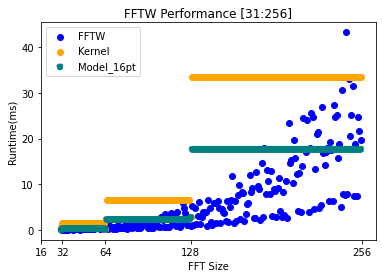

In [376]:
xtickers = [ 2**j for j in range(4,9) ]
ytickers = np.arange(0, 50, 10)
plt.scatter(size[31:256], fftw_runtime[31:256], label='FFTW', color='blue')
plt.scatter(size[31:256], fpga_runtime[31:256], label='Kernel', color='orange')
plt.scatter(size[31:256], model_fft1d16_runtime[31:256], label='Model_16pt', color='teal', linestyle='dashed')

plt.xlabel('FFT Size')
plt.ylabel('Runtime(ms)')
plt.title('FFTW Performance [31:256]')
plt.xticks(xtickers)
plt.yticks(ytickers)
plt.legend(loc='upper left')
plt.show()

# Model factoring into powers-of-2 or prime

In [378]:
print(fftw_runtime[455])

54.342656
